# Logistic Regression with Regularization

This notebook demonstrates logistic regression with regularization on a non-linear dataset. We'll explore:
1. Feature transformation using polynomial features
2. Effect of regularization (λ parameter)
3. Effect of polynomial degree on overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :-1]  # Features
Y = data[:, -1]    # Labels

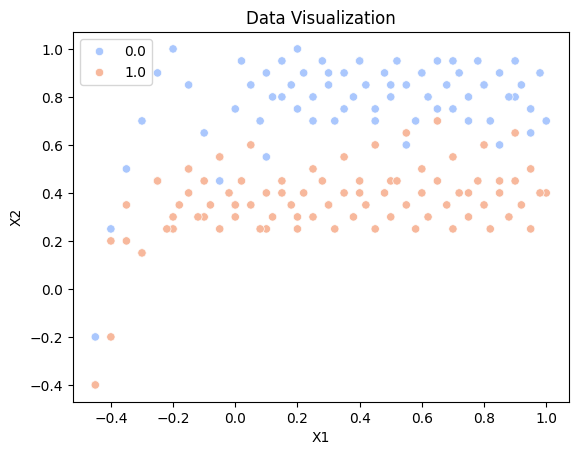

In [3]:
# Visualize the dataset
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='coolwarm')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Visualization')
plt.show()

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def loss_function(Y, H):
    return -np.mean(Y * np.log(H) + (1 - Y) * np.log(1 - H))

In [6]:
def compute_gradient(X, Y, H):
    return np.dot(X.T, (H - Y)) / len(Y)

In [7]:
def feature_representation(X, power):
    from itertools import combinations
    poly_features = [np.ones(len(X))]
    for p in range(1, power + 1):
        for combo in combinations(range(X.shape[1]), p):
            poly_features.append(np.prod(X[:, combo], axis=1))
    return np.array(poly_features).T

In [8]:
def gradient_descent(X, Y, alpha, iterations, lambda_reg, power):
    X_poly = feature_representation(X, power)
    theta = np.zeros(X_poly.shape[1])
    
    for _ in range(iterations):
        H = sigmoid(np.dot(X_poly, theta))
        gradient = compute_gradient(X_poly, Y, H) + (lambda_reg * theta) / len(Y)
        theta -= alpha * gradient
        
    return theta

In [9]:
# Set hyperparameters
alpha = 0.01
iterations = 10000
lambda_reg = 0.1
power = 20 # Change as needed

theta = gradient_descent(X, Y, alpha, iterations, lambda_reg, power)

In [10]:
def plot_decision_boundary(X, Y, theta):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    Z = sigmoid(np.dot(feature_representation(np.c_[xx1.ravel(), xx2.ravel()], power), theta))
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, levels=[0, 0.5, 1], alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap='coolwarm')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()

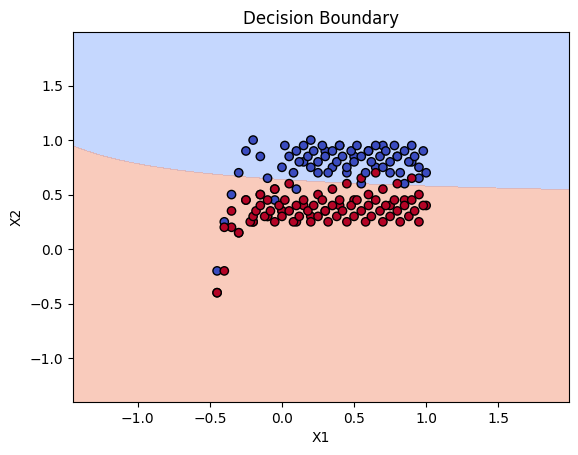

In [11]:
plot_decision_boundary(X, Y, theta)

In [30]:
def regularized_gradient_descent(X, Y, alpha, iterations, lambda_reg, power):
    X_poly = feature_representation(X, power)
    theta = np.zeros(X_poly.shape[1])
    
    for _ in range(iterations):
        H = sigmoid(np.dot(X_poly, theta))
        gradient = compute_gradient(X_poly, Y, H) + (lambda_reg * theta) / len(Y)
        theta -= alpha * gradient
        
    return theta

In [31]:
# Set hyperparameters for regularization
lambda_reg = 1  # Change as needed

theta_reg = regularized_gradient_descent(X, Y, alpha, iterations, lambda_reg, power)

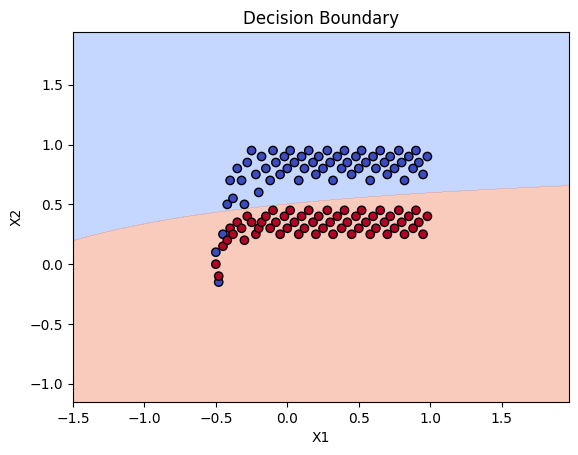

In [32]:
plot_decision_boundary(X, Y, theta_reg)